In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv('Project_Database_NoOutliers_Encoded.csv')
df

,Unnamed: 0,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,loudness,...,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly,mood_encoded,genre_encoded
0,0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,-4.667,...,party,9,1.918977,butterflies,11,19.402985,0,1,4,161
1,1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,-4.939,...,love,14,2.473498,leatherstudded,14,5.300353,0,-1,4,164
2,2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,-6.354,...,believe,6,1.749271,everything,10,22.448980,0,1,4,161
3,3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,-3.755,...,got,10,2.032520,replayayayay,12,12.804878,0,1,4,161
4,4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,-6.800,...,so,8,2.359882,everything,10,20.058997,0,1,4,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12118,12123,Lutov Doko,0.564,0.715,76.583,0.2220,Simghera,47.0,0.0536,-8.206,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,217
12119,12124,Ramil',0.789,0.457,135.100,0.1160,Из-за тебя,60.0,0.1820,-8.621,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,2,217
12120,12125,DYSTINCT,0.760,0.544,100.021,0.2220,Habiba (feat. Tawsen),67.0,0.0539,-5.032,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,161
12121,12126,Greg Willen,0.657,0.342,90.006,0.2220,Marvin Vettori - The Italian Dream,63.0,0.1740,-4.554,...,Not Found,7,1.804124,Not Found,10,19.277108,0,1,1,170


In [3]:
list(df)

['Unnamed: 0',
 'artist',
 'danceability',
 'valence',
 'tempo',
 'liveness',
 'song',
 'popularity',
 'speechiness',
 'loudness',
 'duration_ms',
 'energy',
 'release_date',
 'acousticness',
 'mode',
 'instrumentalness',
 'key',
 'year',
 'artist_popularity',
 'artist_followers',
 'hit',
 'words_count',
 'words_average_size',
 '1st_word',
 '1st_occurence',
 '1st_word_percentage',
 '2nd_word',
 '2nd_occurence',
 '2nd_word_percentage',
 '3rd_word',
 '3rd_occurence',
 '3rd_word_percentage',
 '4th_word',
 '4th_occurence',
 '4th_word_percentage',
 '5th_word',
 '5th_occurence',
 '5th_word_percentage',
 'longest_word',
 'longest_word_length',
 'unique_word_percentage',
 'Explicitness',
 'anomaly',
 'mood_encoded',
 'genre_encoded']

## Words Count vs Popularity

Question: Do songs with more or fewer words tend to be more popular?

Meaning:

If shorter songs are more popular → listeners prefer concise songs.

If wordier songs do better → storytelling might be key.

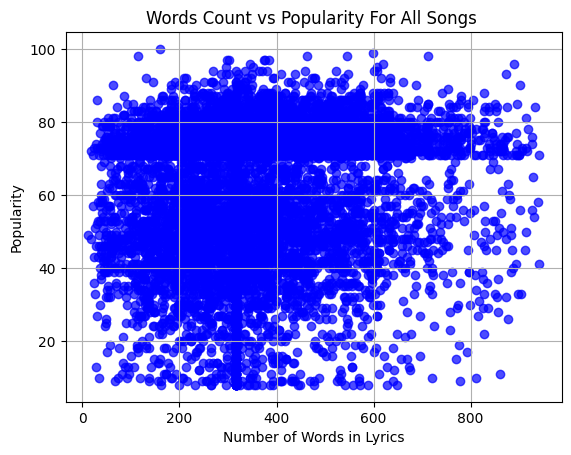

In [4]:
df_wordscount_vs_poplrty_all = df[(df['words_count'] > 10 ) ]

plt.scatter(df_wordscount_vs_poplrty_all['words_count'], df_wordscount_vs_poplrty_all['popularity'], color='blue', alpha=0.7)
plt.title('Words Count vs Popularity For All Songs ')
plt.xlabel('Number of Words in Lyrics')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

#### For Hit Songs

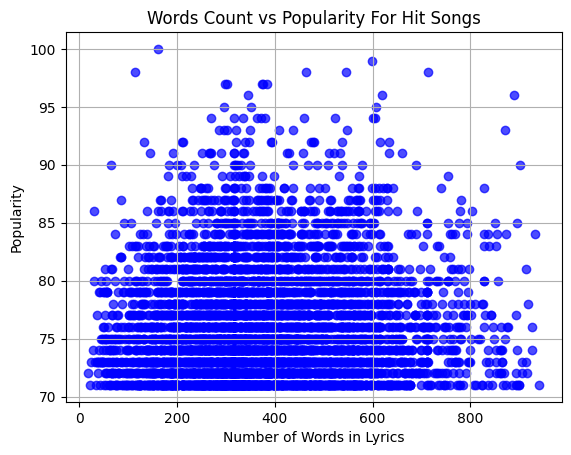

In [ ]:
df_wordscount_vs_poplrty_hits = df[(df['words_count'] > 10 ) & (df['hit']==1)]

plt.scatter(df_wordscount_vs_poplrty_hits['words_count'], df_wordscount_vs_poplrty_hits['popularity'], color='blue', alpha=0.7)
plt.title('Words Count vs Popularity For Hit Songs')
plt.xlabel('Number of Words in Lyrics')
plt.ylabel('Popularity')
plt.grid(True)
plt.savefig('words_vs_popularity_hit_songs.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\Hani\AppData\Local\Temp\ipykernel_19872\2393675564.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mostoccuringword_billboard['1st_word'] = df_mostoccuringword_billboard['1st_word'].str.lower()


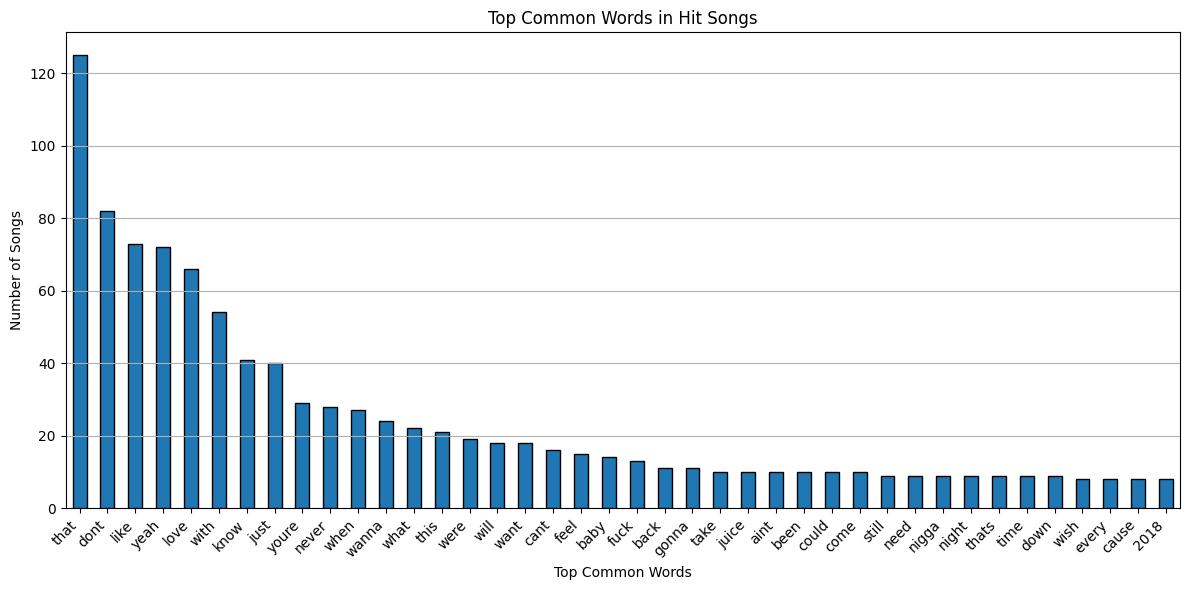

In [ ]:
df_mostoccuringword_billboard = df[(df['words_count'] >= 50) & (df['hit'] == 1) & (df['1st_word'].str.len() >= 4) & (df['1st_word'] != 'Not Found')& (df['1st_word'] != 'feat') ]

df_mostoccuringword_billboard['1st_word'] = df_mostoccuringword_billboard['1st_word'].str.lower()
word_counts = df_mostoccuringword_billboard['1st_word'].value_counts()
top_words = word_counts.head(40)

plt.figure(figsize=(12,6))
top_words.plot(kind='bar', edgecolor='black')

plt.xlabel('Top Common Words')
plt.ylabel('Number of Songs')
plt.title('Top Common Words in Hit Songs')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


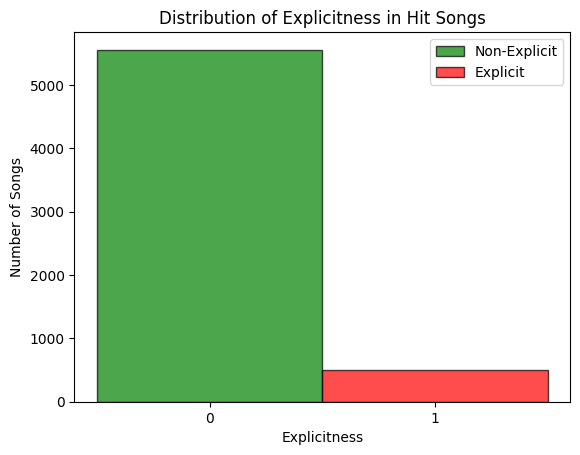

In [ ]:
df_explicitiness_vs_popularity_hits = df[(df['hit'] == 1)]

non_explicit = df_explicitiness_vs_popularity_hits[df_explicitiness_vs_popularity_hits['Explicitness'] == 0]
explicit = df_explicitiness_vs_popularity_hits[df_explicitiness_vs_popularity_hits['Explicitness'] == 1]


plt.hist(non_explicit['Explicitness'], bins=1, edgecolor='black', color='green', label='Non-Explicit', alpha=0.7)
plt.hist(explicit['Explicitness'], bins=1, edgecolor='black', color='red', label='Explicit', alpha=0.7)

plt.xlabel('Explicitness')
plt.ylabel('Number of Songs')
plt.title('Distribution of Explicitness in Hit Songs')

plt.legend()
plt.xticks([0, 1])
plt.savefig('averagewordsize.png', dpi=300, bbox_inches='tight')
plt.show()

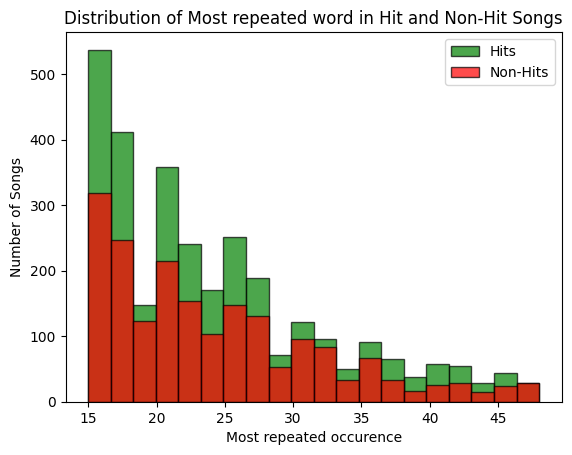

In [ ]:
df_repetition_vs_popularity_hits = df[(df['1st_occurence'] >= 15) & (df['hit'] == 1)]
df_repetition_vs_popularity_nonhits = df[(df['1st_occurence'] >= 15) & (df['hit'] == 0)]

plt.hist(df_repetition_vs_popularity_hits['1st_occurence'], bins=20, edgecolor='black', color='green', label='Hits', alpha=0.7)
plt.hist(df_repetition_vs_popularity_nonhits['1st_occurence'], bins=20, edgecolor='black', color='red', label='Non-Hits', alpha=0.7)

plt.xlabel('Most repeated occurence')
plt.ylabel('Number of Songs')
plt.title('Distribution of Most repeated word in Hit and Non-Hit Songs')
plt.legend()
plt.savefig('1st_word_occurence.png', dpi=300, bbox_inches='tight') 
plt.show()


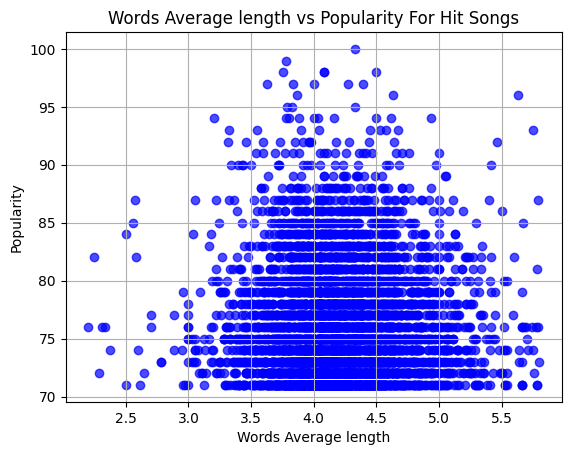

In [ ]:
df_wordaveragesize_vs_popularity_hits = df[(df['hit'] == 1) & (df['words_average_size'] > 0) & (df['words_count'] > 50)]

plt.scatter(df_wordaveragesize_vs_popularity_hits['words_average_size'], df_wordaveragesize_vs_popularity_hits['popularity'], color='blue', alpha=0.7)
plt.title('Words Average length vs Popularity For Hit Songs')
plt.xlabel('Words Average length')
plt.ylabel('Popularity')
plt.grid(True)
plt.savefig('averagewordsize.png', dpi=300, bbox_inches='tight') 

plt.show()